<a href="https://colab.research.google.com/github/chandrakiranck/fuzzy-adventure/blob/master/bike_sharing_by_day_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

import mlxtend

In [8]:
data=pd.read_csv("/content/drive/My Drive/casestudy datasets/bike sharing by day.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [0]:
data.drop(["casual","registered","instant",'dteday'],axis=1,inplace=True)


In [10]:
data.shape

(731, 12)

In [11]:
data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,8714.000000


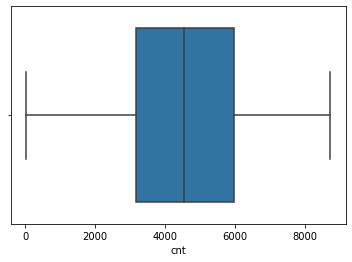

In [12]:
sns.boxplot(data.cnt)


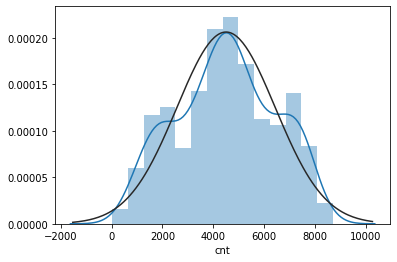

In [13]:
from scipy.stats import norm
sns.distplot(data.cnt,fit=norm)

##  univariate analysis

SEASON

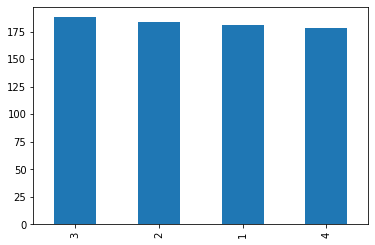

In [14]:
data.season.value_counts().plot.bar()

windspeed

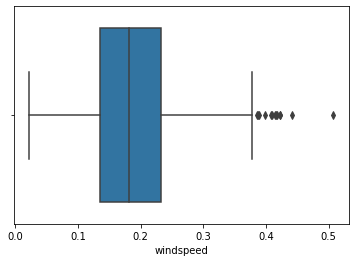

In [15]:
sns.boxplot(data.windspeed)

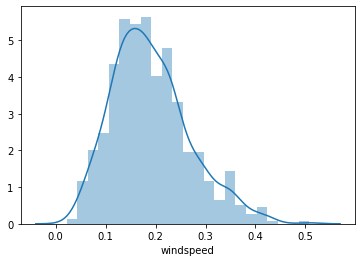

In [16]:
sns.distplot(data.windspeed)

In [17]:
(0.507-0.1904)/0.0774

4.090439276485788

for illustration of univariate analysis, we have covered season (categorical anaysis) and  windspeed (continuous analysis)

## **Bivariate Analysis**

Count and  Season

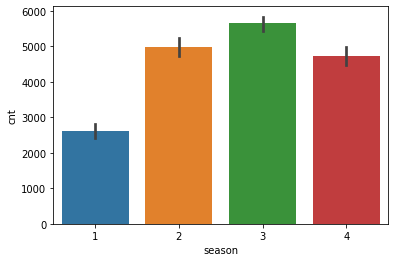

In [18]:
sns.barplot(x=data.season,y=data.cnt)

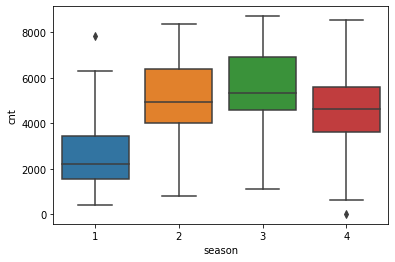

In [19]:
sns.boxplot(x=data.season,y=data.cnt)

CNT AND WEEKDAY

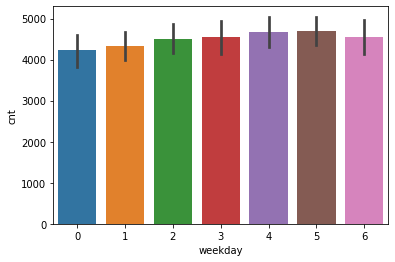

In [20]:
sns.barplot(data.weekday,data.cnt)

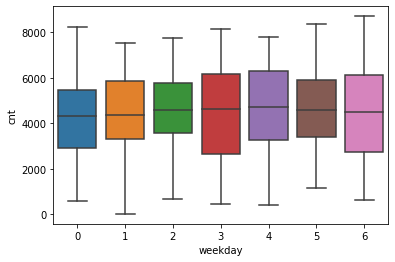

In [21]:
sns.boxplot(x=data.weekday,y=data.cnt)

TEMP AND CNT

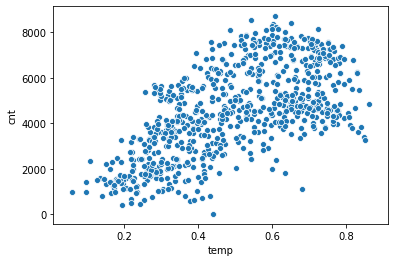

In [22]:
sns.scatterplot(data.temp,data.cnt) 

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


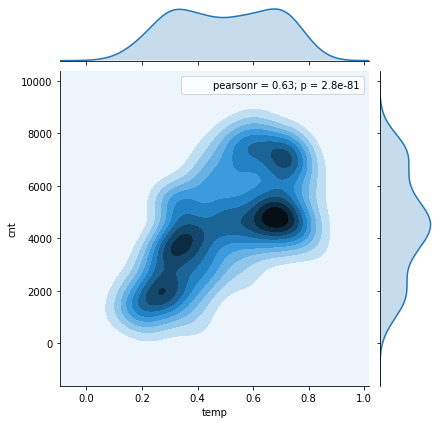

In [23]:

from scipy.stats import pearsonr
sns.jointplot(data.temp,data.cnt,kind="kde",stat_func=pearsonr)

In [24]:
q1=data.temp.quantile(0.25)
q2=data.temp.quantile(0.5)
q3=data.temp.quantile(0.75)
print("q1",q1)
print("q2",q2)
print("q3",q3)

def temp_cat(tmp):
  if tmp <q1:
    return 1
  elif q1<=tmp<q2:
    return 2
  elif q2<=tmp<q3:
    return 3
  else :
    return 4

data["temp_cat"]=data["temp"].apply(temp_cat)

q1 0.3370835
q2 0.49833299999999997
q3 0.6554165000000001


In [25]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,temp_cat
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985,2
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801,2
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349,1
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562,1
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600,1


In [26]:
data.groupby("temp_cat")["temp"].agg(["min","max"])

,min,max
temp_cat,,
1,0.059130,0.336667
2,0.337500,0.495000
3,0.498333,0.655000
4,0.655833,0.861667


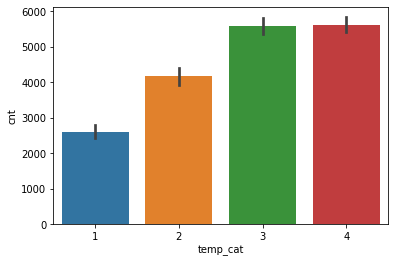

In [27]:
sns.barplot(x=data.temp_cat,y=data.cnt)

COUNT AND WIND SPEED

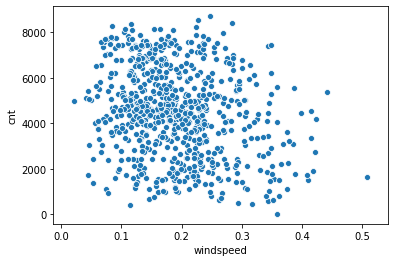

In [28]:
sns.scatterplot(data.windspeed,data.cnt) 

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


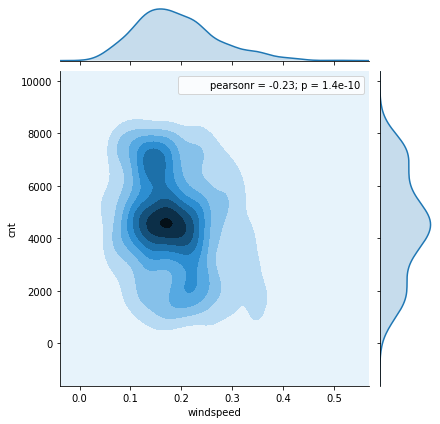

In [29]:
from scipy.stats import pearsonr
sns.jointplot(data.windspeed,data.cnt,kind="kde",stat_func=pearsonr)

In [30]:
q1=data.windspeed.quantile(0.25)
q2=data.windspeed.quantile(0.5)
q3=data.windspeed.quantile(0.75)
print("q1",q1)
print("q2",q2)
print("q3",q3)

def windspeed_cat(tmp):
  if tmp <q1:
    return 1
  elif q1<=tmp<q2:
    return 2
  elif q2<=tmp<q3:
    return 3
  else :
    return 4

data["windspeed_cat"]=data["windspeed"].apply(windspeed_cat)

q1 0.13495
q2 0.180975
q3 0.2332145


In [31]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,temp_cat,windspeed_cat
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985,2,2
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801,2,4
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349,1,4
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562,1,2
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600,1,3


In [32]:
data.groupby("windspeed_cat")["windspeed"].agg(["min","max"])

,min,max
windspeed_cat,,
1,0.022392,0.134342
2,0.134950,0.180967
3,0.180975,0.233208
4,0.233221,0.507463


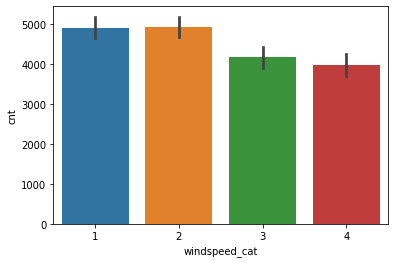

In [33]:
sns.barplot(data.windspeed_cat,y=data.cnt)

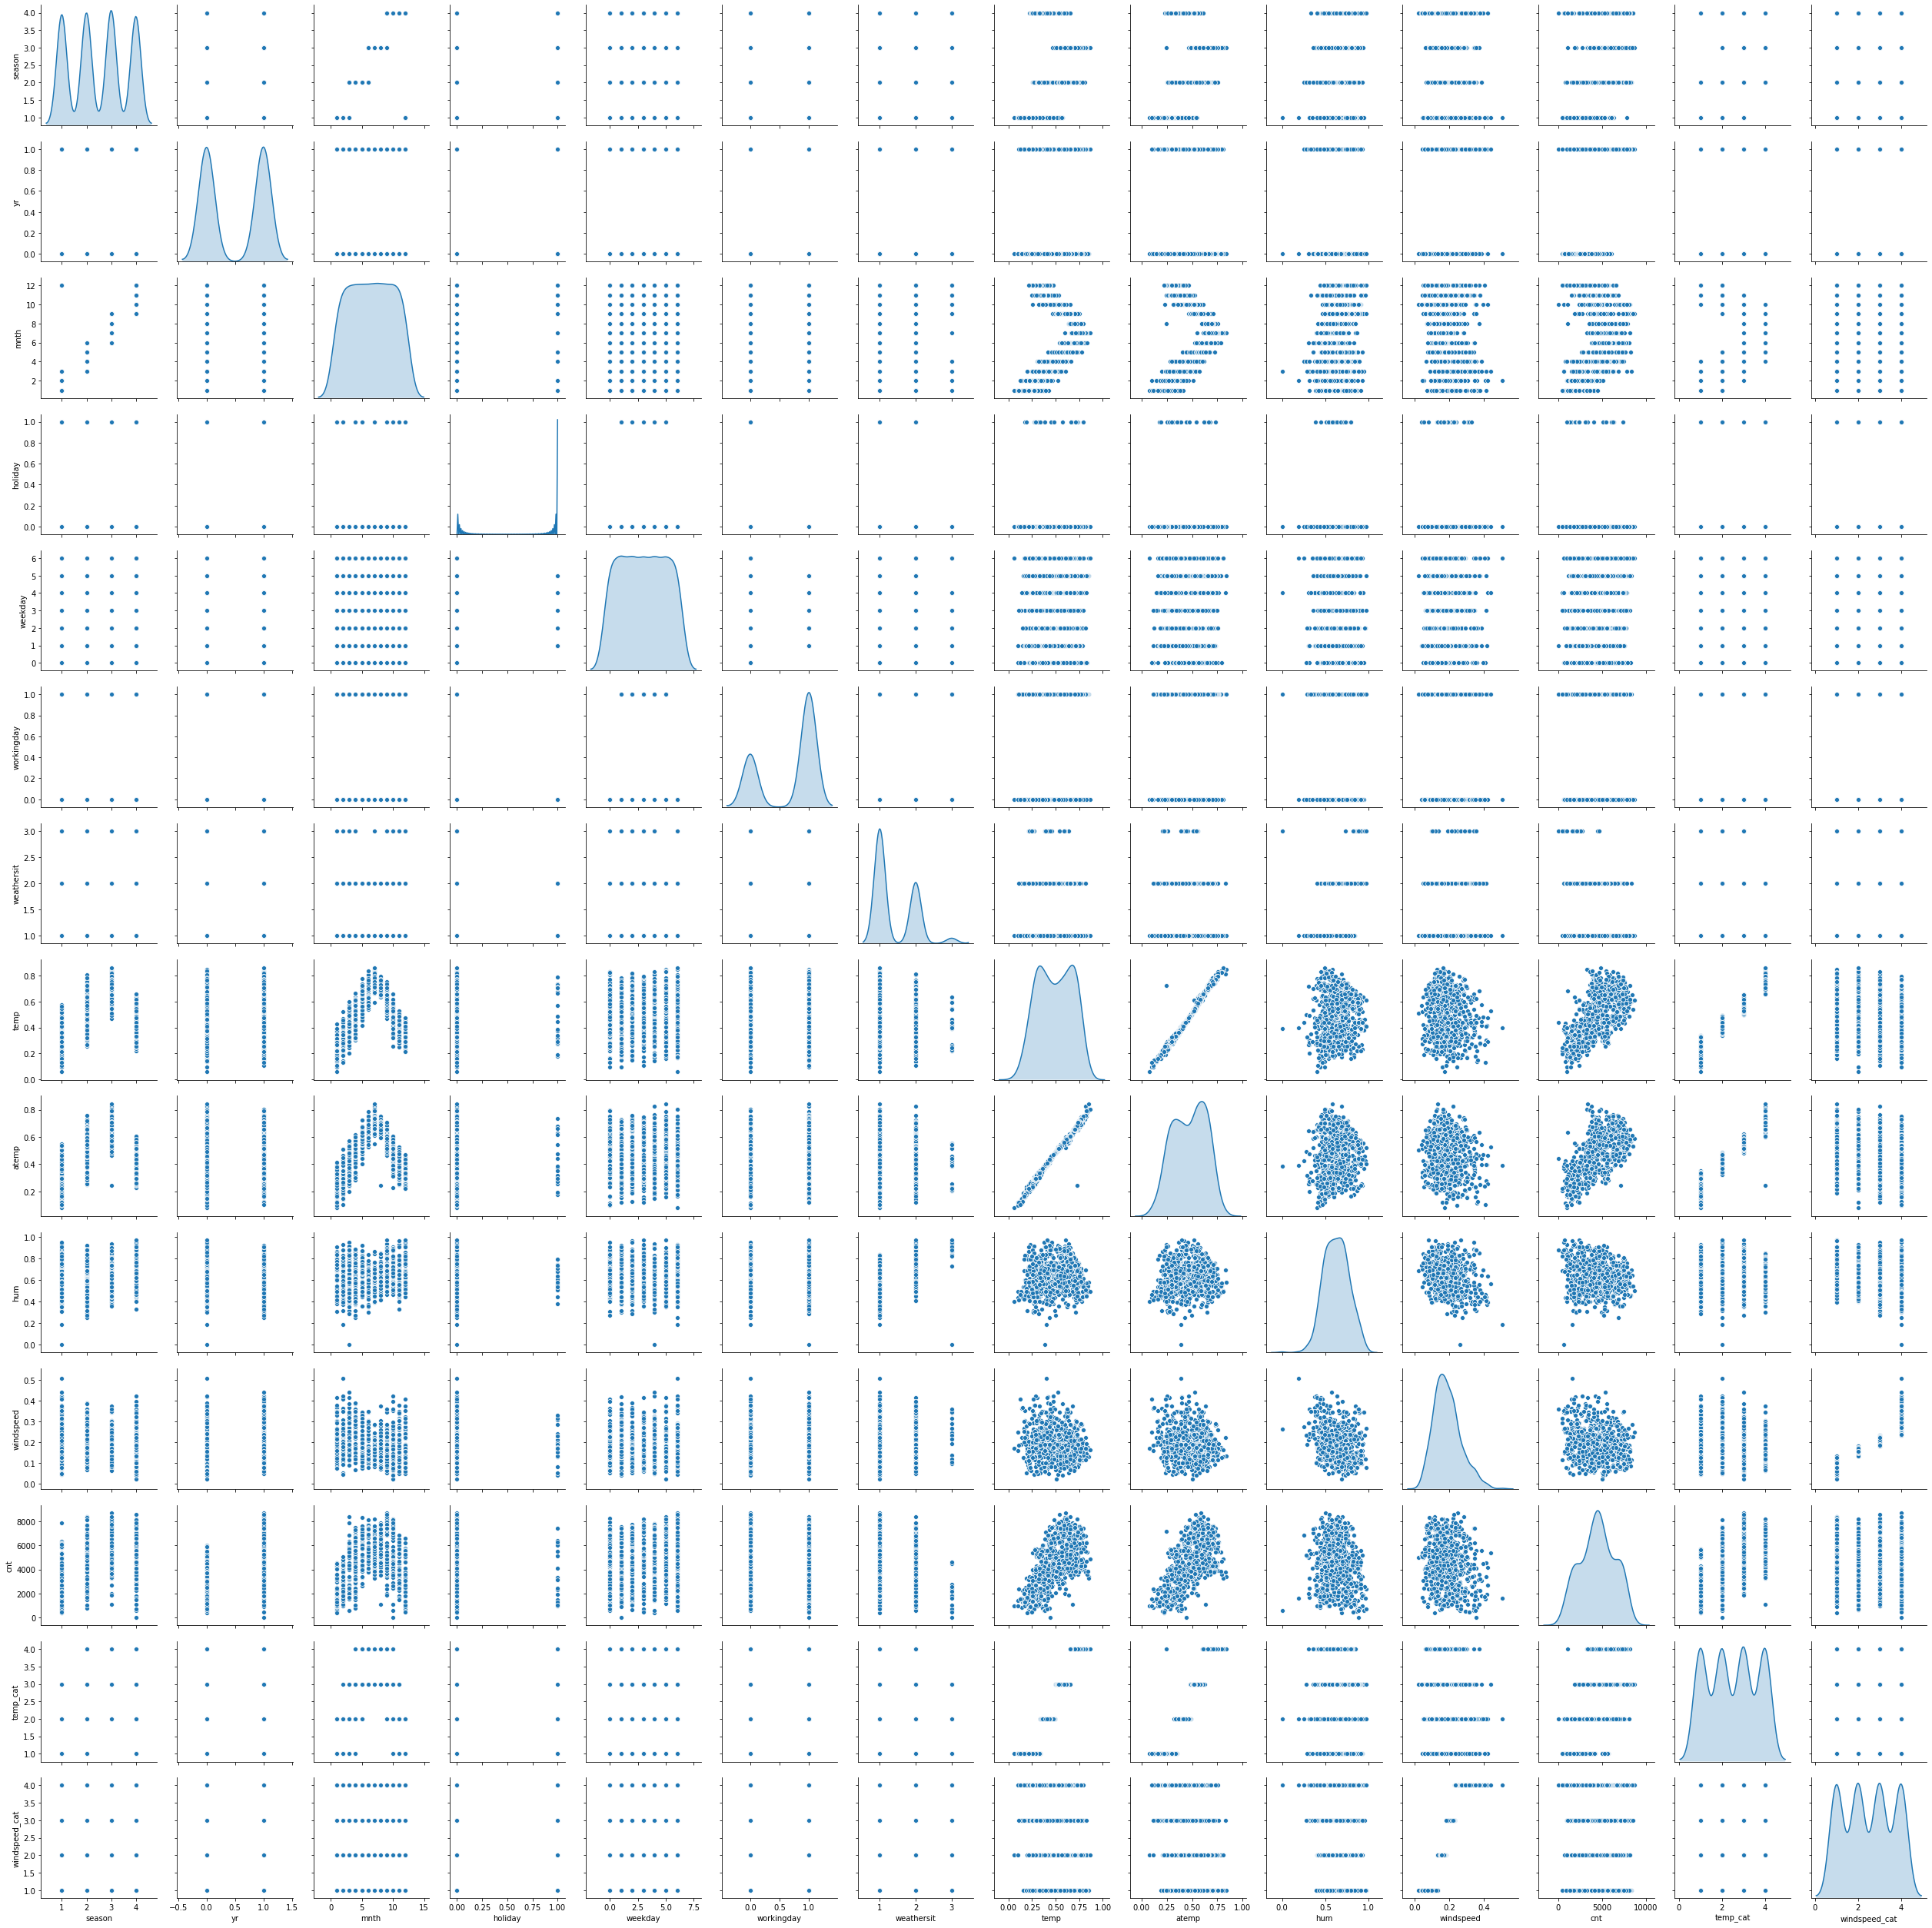

In [34]:
sns.pairplot(data,diag_kind="kde")

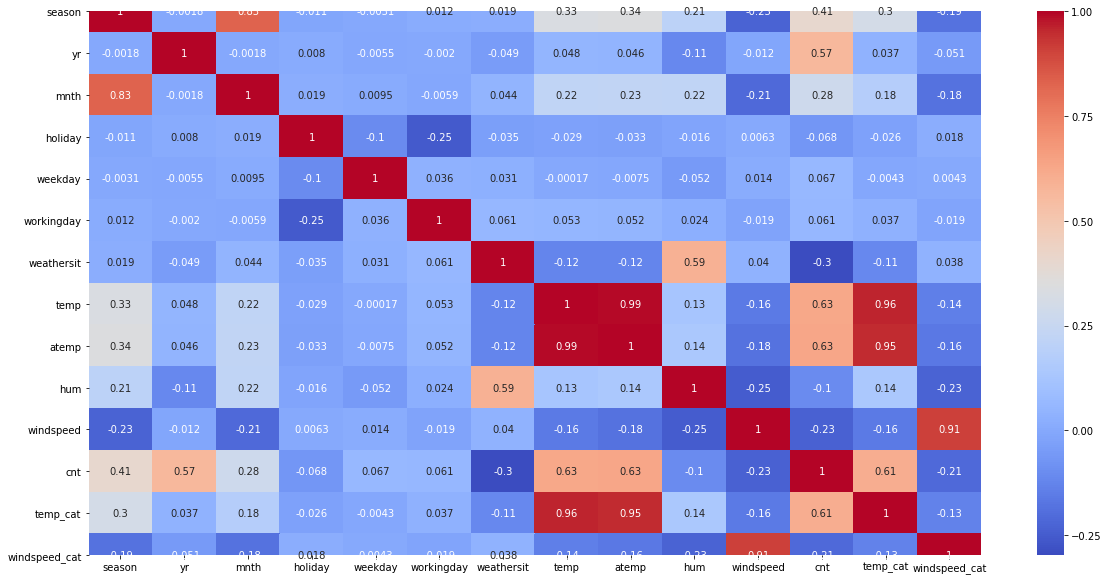

In [35]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")

categorical Variables

In [36]:
list(data.columns)

['season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'cnt',
 'temp_cat',
 'windspeed_cat']

In [0]:
data=data.drop(["windspeed_cat","temp_cat"],axis=1)
cat_cols=['season','mnth','weekday','weathersit']
data=pd.get_dummies(data,columns=cat_cols,drop_first=True)

In [38]:
data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,0.344167,0.363625,0.805833,0.160446,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0.363478,0.353739,0.696087,0.248539,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0.196364,0.189405,0.437273,0.248309,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0.200000,0.212122,0.590435,0.160296,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0.226957,0.229270,0.436957,0.186900,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [39]:
data.shape

(731, 30)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 30 columns):
yr              731 non-null int64
holiday         731 non-null int64
workingday      731 non-null int64
temp            731 non-null float64
atemp           731 non-null float64
hum             731 non-null float64
windspeed       731 non-null float64
cnt             731 non-null int64
season_2        731 non-null uint8
season_3        731 non-null uint8
season_4        731 non-null uint8
mnth_2          731 non-null uint8
mnth_3          731 non-null uint8
mnth_4          731 non-null uint8
mnth_5          731 non-null uint8
mnth_6          731 non-null uint8
mnth_7          731 non-null uint8
mnth_8          731 non-null uint8
mnth_9          731 non-null uint8
mnth_10         731 non-null uint8
mnth_11         731 non-null uint8
mnth_12         731 non-null uint8
weekday_1       731 non-null uint8
weekday_2       731 non-null uint8
weekday_3       731 non-null uint8
weekday_4   

In [0]:
data["yr"]=data["yr"].map({0:2011,1:2012})

In [42]:
data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,2011,0,0,0.344167,0.363625,0.805833,0.160446,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,2011,0,0,0.363478,0.353739,0.696087,0.248539,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2011,0,1,0.196364,0.189405,0.437273,0.248309,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,2011,0,1,0.200000,0.212122,0.590435,0.160296,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2011,0,1,0.226957,0.229270,0.436957,0.186900,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


## **LINEAR REGRESSION - STATISTICS**

In [43]:
import statsmodels.api as sm
x=data.drop("cnt",axis=1)
x=x.drop(["workingday","atemp","mnth_7","mnth_11","mnth_12","season_2",],axis=1)
y=data.cnt
x["temp2"]=np.square(x["temp"])
#x["temp_wind"]=np.multiply(x["temp"],x["windspeed"])
x_constant=sm.add_constant(x)
model=sm.OLS(y,x_constant).fit()
predictions=model.predict(x_constant)
model.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     179.1
Date:                Tue, 05 Nov 2019   Prob (F-statistic):          3.37e-281
Time:                        04:04:31   Log-Likelihood:                -5853.8
No. Observations:                 731   AIC:                         1.176e+04
Df Residuals:                     706   BIC:                         1.187e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -3.916e+06   1.13e+05    -34.743      0.000   -4.14e+06    -3.7e+06
yr            1947.4099     56.042     34.749      0.000    1837.381    2057.438
holiday       -584.2129    172.200     -3.393      0.001    -922.298    -246.128
temp          1.579e+04   1192.589     13.237      0.000    1.34e+04    1.81e+04
hum          -1949.0909    279.233     -6.980      0.000   -2497.318   -1400.864
windspeed    -3387.4038    390.098     -8.683      0.000   -4153.294   -2621.513
season_3       638.8952    147.530      4.331      0.000     349.246     928.545
season_4       985.5801    112.938      8.727      0.000     763.845    1207.315
mnth_2        -151.0080    126.230     -1.196      0.232    -398.840      96.824
mnth_3         307.4146    132.558      2.319      0.021      47.160     567.669
mnth_4         636.3962    144.789      4.395      0.000     352.127     920.665
mnth_5         992.3316    153.406      6.469      0.000     691.145    1293.519
mnth_6         757.7824    140.039      5.411      0.000     482.839    1032.726
mnth_8         305.7342    127.417      2.399      0.017      55.572     555.896
mnth_9         699.5698    124.543      5.617      0.000     455.050     944.089
mnth_10        405.7062    122.785      3.304      0.001     164.638     646.774
weekday_1      206.1009    105.234      1.958      0.051      -0.508     412.710
weekday_2      288.5569    102.828      2.806      0.005      86.672     490.442
weekday_3      369.1619    103.101      3.581      0.000     166.740     571.583
weekday_4      368.0613    103.030      3.572      0.000     165.780     570.343
weekday_5      409.7479    103.025      3.977      0.000     207.476     612.020
weekday_6      437.5794    102.427      4.272      0.000     236.481     638.678
weathersit_2  -437.8185     73.672     -5.943      0.000    -582.461    -293.176
weathersit_3 -1930.8051    188.619    -10.237      0.000   -2301.127   -1560.483
temp2        -1.132e+04   1219.014     -9.285      0.000   -1.37e+04   -8925.288
==============================================================================
Omnibus:                       98.116   Durbin-Watson:                   1.207
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.164
Skew:                          -0.697   Prob(JB):                     1.44e-56
Kurtosis:                       5.550   Cond. No.                     8.29e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.29e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Rsquare**---84.8% of variance in count(cnt) is explained by the all the independent variables

**AdjRsquare**---it is based on no of varaibles


**F-statistic**--null hypothesis is all the coeffients are zero
                alternate hypothesis is atleast one coeff is not zero


**Prob (F-statistic):**	8.67e-266 is the probability getting f-value>= 140 where null hypothesis is True

**hence we  reject null hypothesis and we reject alternate hypothesis**




In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif = [variance_inflation_factor(x_constant.values, i) for i in range(x_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=x.columns).T

,yr,holiday,temp,hum,windspeed,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_8,mnth_9,mnth_10,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,temp2
vif,1.048538,1.104914,63.555389,2.109398,1.218857,5.552681,3.137704,1.529846,1.82144,2.109273,2.43944,1.973154,1.682904,1.560633,1.562776,1.819128,1.723095,1.732264,1.729872,1.729702,1.723375,1.621563,1.325671,65.829855


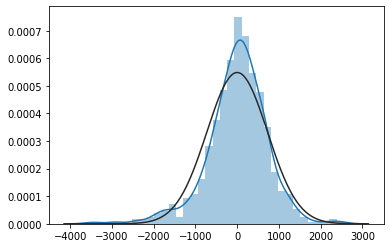

In [45]:
from scipy.stats import norm
norm.fit(model.resid)

sns.distplot(model.resid,fit=norm)

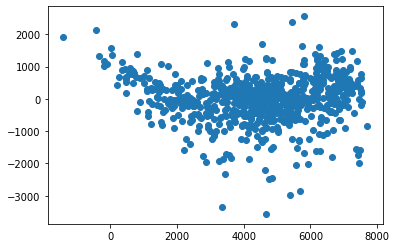

In [46]:
y_pred=model.predict(x_constant)
plt.scatter(x=y_pred,y=model.resid)

HETEROSCADESTICITY

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


[('F statistic', 2.1393742179873017), ('p-value', 1.942783860861132e-12)]

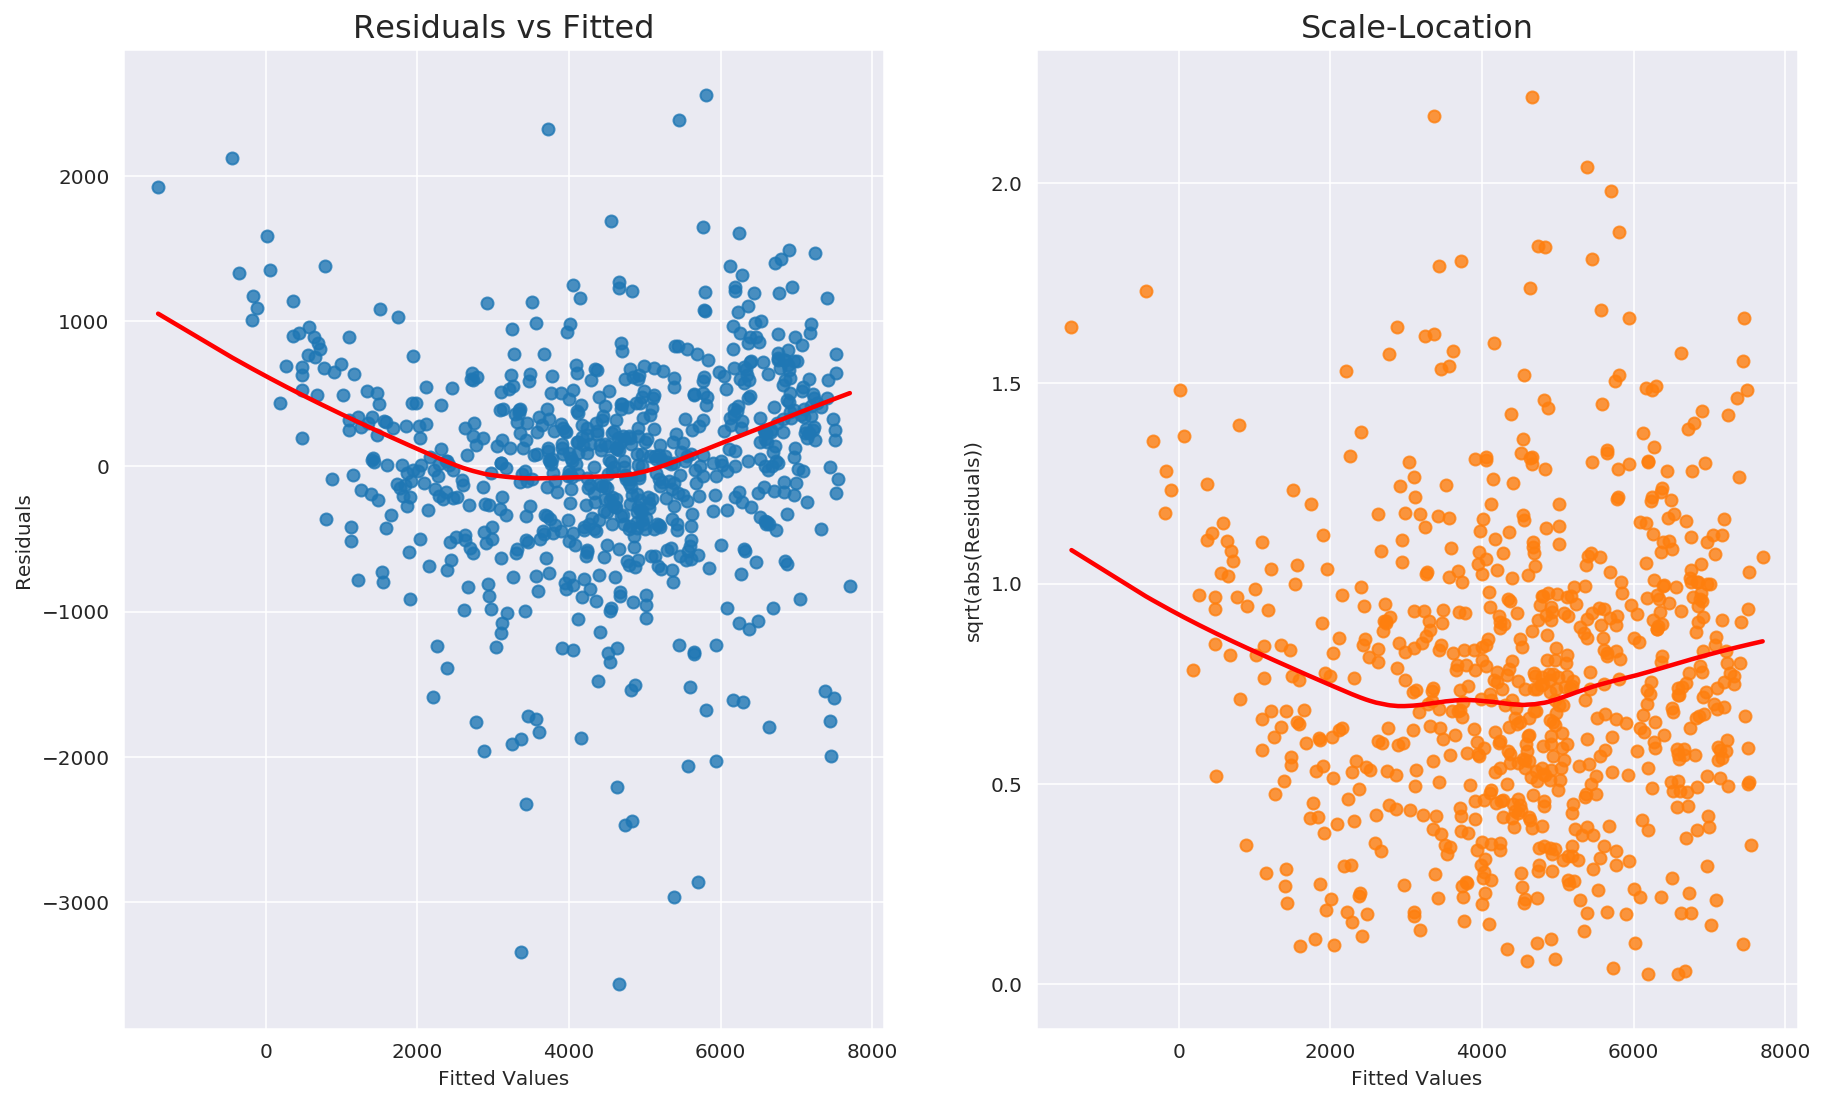

In [47]:
x_constant = sm.add_constant(x)
lm= sm.OLS(y,x_constant).fit()

from statsmodels.compat import lzip
import numpy as np
from statsmodels.compat import lzip
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

model = lm
fitted_vals = model.predict()
resids = model.resid
resids_standardized = model.get_influence().resid_studentized_internal
fig, ax = plt.subplots(1,2)

sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Residuals vs Fitted', fontsize=16)
ax[0].set(xlabel='Fitted Values', ylabel='Residuals')
sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Scale-Location', fontsize=16)
ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
lzip(name, test)


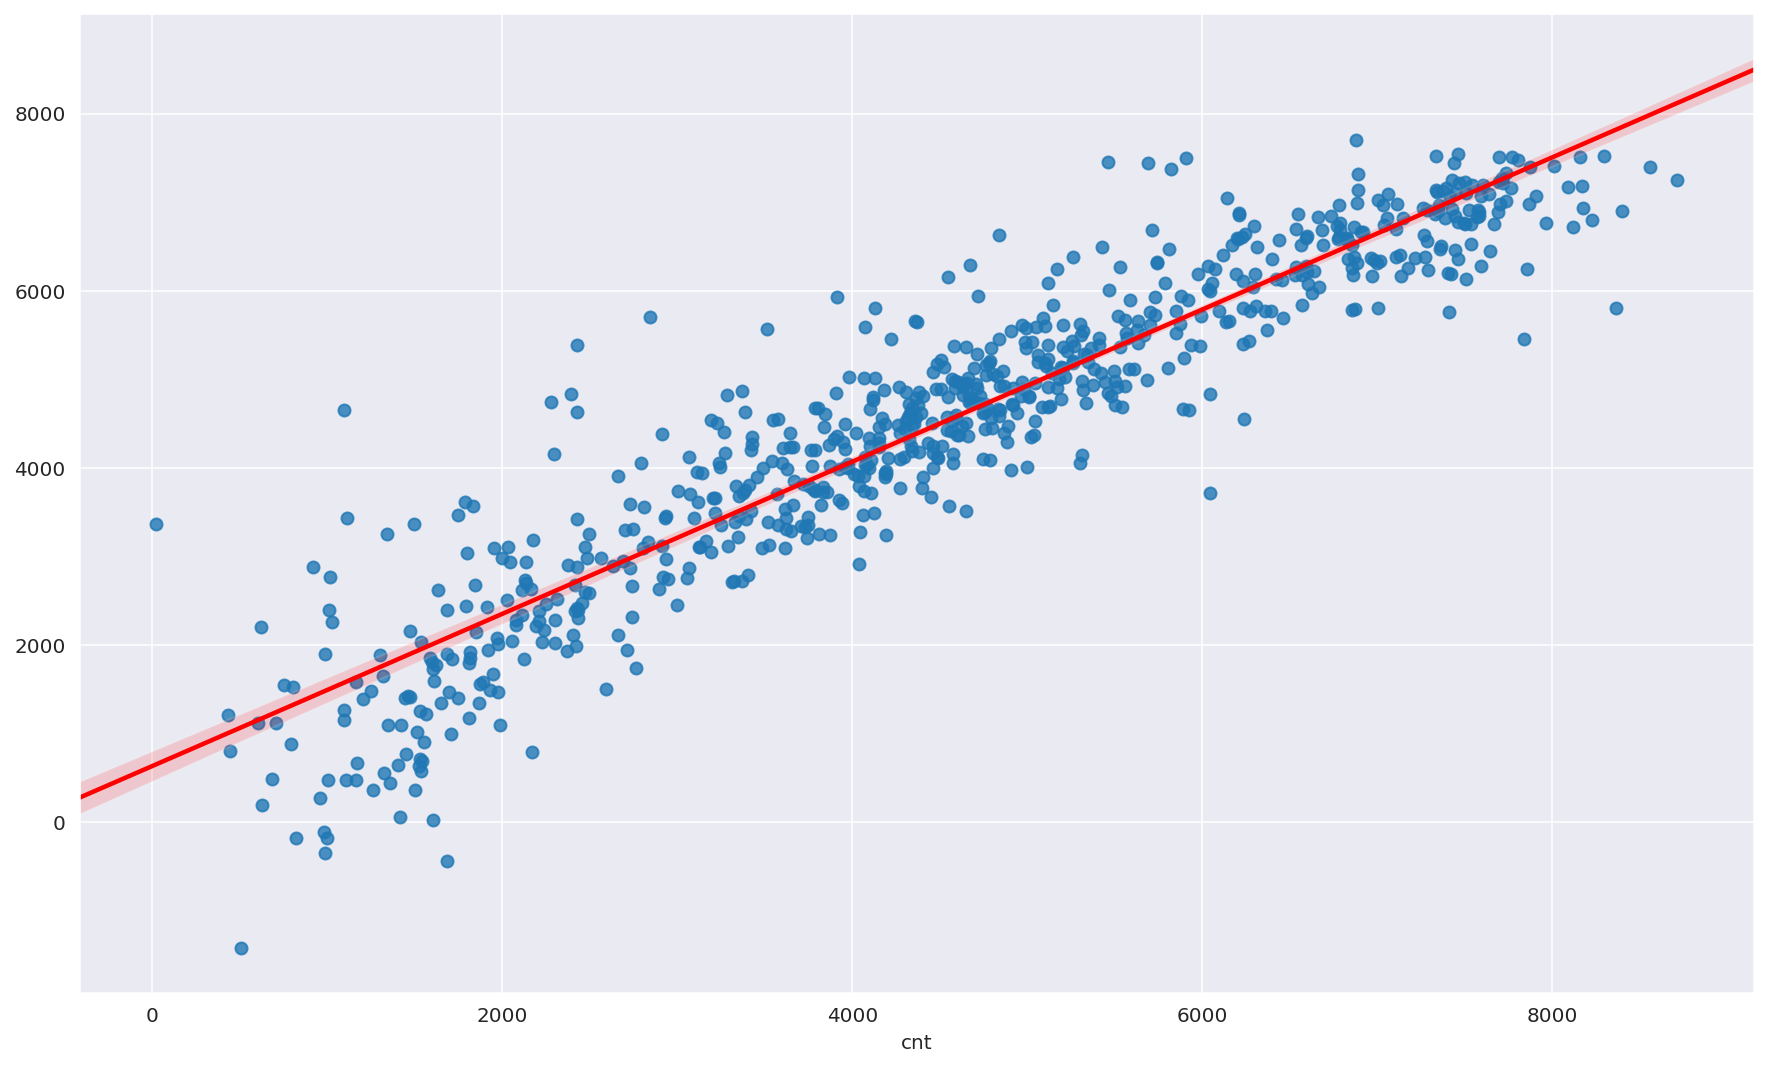

In [48]:
sns.regplot(x=y,y=y_pred,line_kws={"color":"r"})

**Polynomial Regression**

In [0]:
x=data.drop("cnt",axis=1)
x=x.drop(["workingday","atemp"],axis=1)
y=data.cnt

In [0]:
from sklearn.preprocessing import PolynomialFeatures

pf=PolynomialFeatures()

X=pf.fit_transform(x)

feature_names=pf.get_feature_names(x.columns)
X=pd.DataFrame(X,columns=feature_names)

In [51]:
X.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 406 columns):
1                            float64
yr                           float64
holiday                      float64
temp                         float64
hum                          float64
windspeed                    float64
season_2                     float64
season_3                     float64
season_4                     float64
mnth_2                       float64
mnth_3                       float64
mnth_4                       float64
mnth_5                       float64
mnth_6                       float64
mnth_7                       float64
mnth_8                       float64
mnth_9                       float64
mnth_10                      float64
mnth_11                      float64
mnth_12                      float64
weekday_1                    float64
weekday_2                    float64
weekday_3                    float64
weekday_4                    float64
weekda

In [52]:
model=sm.OLS(y,X).fit()

model.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     35.50
Date:                Tue, 05 Nov 2019   Prob (F-statistic):          8.16e-211
Time:                        04:04:35   Log-Likelihood:                -5461.2
No. Observations:                 731   AIC:                         1.145e+04
Df Residuals:                     469   BIC:                         1.265e+04
Df Model:                         261                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
1                            -1.5101      0.753     -2.006      0.045      -2.989      -0.031
yr                        -1614.2284    427.432     -3.777      0.000   -2454.147    -774.310
holiday                    1.001e+06   5.51e+05      1.815      0.070   -8.28e+04    2.08e+06
temp                      -7.523e+06   1.58e+06     -4.771      0.000   -1.06e+07   -4.42e+06
hum                        2.248e+06   1.12e+06      2.005      0.046    4.48e+04    4.45e+06
windspeed                   2.66e+06   1.49e+06      1.790      0.074   -2.59e+05    5.58e+06
season_2                   2.144e+04   2.22e+05      0.097      0.923   -4.14e+05    4.57e+05
season_3                   7.072e+05   2.76e+05      2.558      0.011    1.64e+05    1.25e+06
season_4                   2.432e+05   2.73e+05      0.891      0.374   -2.93e+05     7.8e+05
mnth_2                     4.881e+05   2.48e+05      1.972      0.049    1640.918    9.75e+05
mnth_3                      3.91e+05   2.95e+05      1.324      0.186   -1.89e+05    9.71e+05
mnth_4                     1.722e+05   1.81e+05      0.949      0.343   -1.84e+05    5.29e+05
mnth_5                     1.006e+06   2.08e+05      4.847      0.000    5.98e+05    1.41e+06
mnth_6                      9.45e+05   2.46e+05      3.841      0.000    4.62e+05    1.43e+06
mnth_7                     6.556e+05   1.89e+05      3.475      0.001    2.85e+05    1.03e+06
mnth_8                     2.854e+05   1.72e+05      1.663      0.097   -5.18e+04    6.23e+05
mnth_9                     2.703e+05   2.47e+05      1.096      0.274   -2.14e+05    7.55e+05
mnth_10                    7.426e+04   2.09e+05      0.355      0.723   -3.37e+05    4.86e+05
mnth_11                     7.65e+04    2.1e+05      0.365      0.716   -3.36e+05    4.89e+05
mnth_12                    4.863e+05   5.07e+05      0.958      0.338   -5.11e+05    1.48e+06
weekday_1                 -2.748e+05   1.74e+05     -1.578      0.115   -6.17e+05    6.74e+04
weekday_2                 -3.412e+05   1.68e+05     -2.037      0.042    -6.7e+05   -1.21e+04
weekday_3                 -3.317e+05   1.72e+05     -1.926      0.055    -6.7e+05    6717.693
weekday_4                 -5.312e+05   1.73e+05     -3.068      0.002   -8.71e+05   -1.91e+05
weekday_5                 -3.019e+05   1.69e+05     -1.784      0.075   -6.34e+05    3.06e+04
weekday_6                 -3.158e+05   1.66e+05     -1.907      0.057   -6.41e+05    9651.476
weathersit_2               2.642e+05    1.4e+05      1.892      0.059   -1.02e+04    5.39e+05
weathersit_3               2.435e+06   2.15e+06      1.132      0.258   -1.79e+06    6.66e+06
yr^2                          0.8019      0.212      3.774      0.000       0.384       1.219
yr holiday                -1093.8941    602.512     -1.816      0.070   -22

In [53]:
cols =list(X.columns)
pmax = 1
while (len(cols)>0):
    p =[]
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values,index = cols)
    pmax =max(p)
    feature_with_p_max = p.idxmax()
    if (pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE =cols
print(selected_features_BE)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


['1', 'yr', 'temp', 'hum', 'windspeed', 'season_3', 'season_4', 'mnth_2', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_3', 'yr^2', 'yr holiday', 'yr temp', 'yr hum', 'yr windspeed', 'yr season_2', 'yr mnth_2', 'yr mnth_4', 'yr mnth_5', 'yr mnth_6', 'yr mnth_7', 'yr mnth_8', 'yr mnth_9', 'yr mnth_11', 'yr mnth_12', 'yr weekday_1', 'yr weekday_2', 'yr weekday_3', 'yr weekday_4', 'yr weekday_5', 'yr weekday_6', 'yr weathersit_2', 'yr weathersit_3', 'holiday season_4', 'holiday mnth_7', 'holiday weekday_1', 'holiday weekday_2', 'holiday weekday_3', 'holiday weekday_5', 'temp^2', 'temp hum', 'temp season_3', 'temp mnth_3', 'temp mnth_4', 'temp mnth_5', 'temp mnth_8', 'temp mnth_9', 'temp mnth_10', 'temp mnth_11', 'temp mnth_12', 'temp weekday_1', 'temp weekday_6', 'hum^2', 'hum windspeed', 'hum mnth_5', 'hum mnth_6', 'hum mnth_7', 'hum mnth_8', 'hum mnth_9', 'hum mnth_10', 'hum weekday_5', 'windspeed^2', '

In [54]:
X=X.loc[:,selected_features_BE]
model=sm.OLS(y,X).fit()

model.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     99.39
Date:                Tue, 05 Nov 2019   Prob (F-statistic):               0.00
Time:                        04:05:18   Log-Likelihood:                -5547.0
No. Observations:                 731   AIC:                         1.129e+04
Df Residuals:                     632   BIC:                         1.175e+04
Df Model:                          98                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
1                            -1.6527      0.311     -5.310      0.000      -2.264      -1.042
yr                        -1662.2794    313.021     -5.310      0.000   -2276.966   -1047.593
temp                      -6.982e+06   8.25e+05     -8.459      0.000    -8.6e+06   -5.36e+06
hum                        3.152e+06   6.81e+05      4.626      0.000    1.81e+06    4.49e+06
windspeed                      3e+06   1.15e+06      2.617      0.009    7.49e+05    5.25e+06
season_3                   6.613e+05   1.27e+05      5.199      0.000    4.12e+05    9.11e+05
season_4                    964.1620     79.288     12.160      0.000     808.463    1119.862
mnth_2                     3.475e+05    1.6e+05      2.167      0.031    3.26e+04    6.62e+05
mnth_5                     7.868e+05   1.14e+05      6.921      0.000    5.64e+05    1.01e+06
mnth_6                     9.694e+05   1.74e+05      5.561      0.000    6.27e+05    1.31e+06
mnth_7                     4.305e+05   1.17e+05      3.672      0.000       2e+05    6.61e+05
mnth_12                    3.884e+05   1.57e+05      2.473      0.014       8e+04    6.97e+05
weekday_1                  -2.99e+05   1.45e+05     -2.058      0.040   -5.84e+05   -1.36e+04
weekday_2                 -3.472e+05   1.48e+05     -2.354      0.019   -6.37e+05   -5.76e+04
weekday_3                  -3.52e+05   1.49e+05     -2.359      0.019   -6.45e+05    -5.9e+04
weekday_4                 -5.397e+05   1.48e+05     -3.658      0.000   -8.29e+05    -2.5e+05
weekday_5                 -3.912e+05   1.47e+05     -2.658      0.008    -6.8e+05   -1.02e+05
weekday_6                 -3.323e+05   1.46e+05     -2.281      0.023   -6.18e+05   -4.62e+04
weathersit_3               1.859e+06   3.49e+05      5.328      0.000    1.17e+06    2.54e+06
yr^2                          0.8259      0.156      5.307      0.000       0.520       1.132
yr holiday                   -1.7831      0.260     -6.860      0.000      -2.293      -1.273
yr temp                    3474.1622    410.431      8.465      0.000    2668.189    4280.135
yr hum                    -1563.5669    338.783     -4.615      0.000   -2228.843    -898.290
yr windspeed              -1486.5791    569.847     -2.609      0.009   -2605.601    -367.557
yr season_2                 654.0455    126.549      5.168      0.000     405.539     902.552
yr mnth_2                  -345.4621    159.467     -2.166      0.031    -658.611     -32.314
yr mnth_4                  -654.2522    126.569     -5.169      0.000    -902.799    -405.705
yr mnth_5                 -1826.2427    246.685     -7.403      0.000   -2310.665   -1341.821
yr mnth_6                 -1615.1020    241.533     -6.687      0.000   -2089.406   -1140.798
yr mnth_7                 -1293.2349    202.243     -6.394      0.000   -16

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
pd.DataFrame({'vif': vif}, index=X.columns).T

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,1,yr,temp,hum,windspeed,season_3,season_4,mnth_2,mnth_5,mnth_6,mnth_7,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_3,yr^2,yr holiday,yr temp,yr hum,yr windspeed,yr season_2,yr mnth_2,yr mnth_4,yr mnth_5,yr mnth_6,yr mnth_7,yr mnth_8,yr mnth_9,yr mnth_11,yr mnth_12,yr weekday_1,yr weekday_2,yr weekday_3,yr weekday_4,yr weekday_5,yr weekday_6,...,mnth_6^2,mnth_7^2,mnth_9 weathersit_2,mnth_10 weekday_3,mnth_10 weekday_4,mnth_10 weathersit_2,mnth_11 weekday_3,mnth_11 weekday_4,mnth_12^2,mnth_12 weekday_3,mnth_12 weekday_4,mnth_12 weekday_5,weekday_1^2,weekday_1 weekday_2,weekday_1 weekday_3,weekday_1 weekday_4,weekday_1 weekday_5,weekday_1 weekday_6,weekday_1 weathersit_3,weekday_2^2,weekday_2 weekday_3,weekday_2 weekday_4,weekday_2 weekday_5,weekday_2 weekday_6,weekday_2 weathersit_3,weekday_3^2,weekday_3 weekday_4,weekday_3 weekday_5,weekday_3 weekday_6,weekday_3 weathersit_3,weekday_4^2,weekday_4 weekday_5,weekday_4 weekday_6,weekday_4 weathersit_3,weekday_5^2,weekday_5 weekday_6,weekday_5 weathersit_3,weekday_6^2,weathersit_2 weathersit_3,weathersit_3^2
vif,0.0,2.034606e+12,6.308811e+07,2.603688e+07,2.181459e+07,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,21.107873,6.312301e+07,2.602948e+07,2.180946e+07,3.377772e+07,2.047337e+07,1.351580e+07,5.289510e+07,4.921948e+07,3.555290e+07,1.391501e+07,1.349816e+07,47.6856,2.119384e+07,2.875913e+07,2.939119e+07,3.007055e+07,2.941061e+07,2.925969e+07,2.890471e+07,...,inf,inf,3.552042,4.342674,3.857468,2.693489,4.274313,4.447719,inf,2.616484,2.643016,1.428427,inf,NaN,NaN,NaN,NaN,NaN,2.302314,inf,NaN,NaN,NaN,NaN,3.504615,inf,NaN,NaN,NaN,5.308647,inf,NaN,NaN,3.621602,inf,NaN,NaN,inf,NaN,inf


## **LINEAR REGRESSION_MACHINE LEARNING**

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [83]:
data=pd.read_csv("/content/drive/My Drive/casestudy datasets/bike sharing by day.csv")
data.drop(["casual","registered","instant",'dteday',"atemp","workingday"],axis=1,inplace=True)
data.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,2,0.344167,0.805833,0.160446,985
1,1,0,1,0,0,2,0.363478,0.696087,0.248539,801
2,1,0,1,0,1,1,0.196364,0.437273,0.248309,1349
3,1,0,1,0,2,1,0.200000,0.590435,0.160296,1562
4,1,0,1,0,3,1,0.226957,0.436957,0.186900,1600


In [0]:
cat_cols=['season','mnth','weekday','weathersit']
data=pd.get_dummies(data,columns=cat_cols,drop_first=True)
data["yr"]=data["yr"].map({0:2011,1:2012})

In [0]:
X=data.drop("cnt",axis=1)
y=data.cnt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, 
                                                    random_state=45)

In [86]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_train_pred=lr.predict(X_train)
print('R2 of train data:',r2_score(y_train,y_train_pred))

y_test_pred=lr.predict(X_test)
print('R2 of test data:',r2_score(y_test,y_test_pred))

R2 of train data: 0.8524668598544345
R2 of test data: 0.822290614536739


In [95]:
cf=pd.DataFrame([X_train.columns,lr.coef_]).T
cf.columns=["cols","coefs"]
cf

,cols,coefs
0,yr,2017.3
1,holiday,-652.015
2,temp,3992.07
3,hum,-1283.51
4,windspeed,-1860.9
5,season_2,913.325
6,season_3,887.66
7,season_4,1587.99
8,mnth_2,151.148
9,mnth_3,439.324


**Feature selection RFE**

In [98]:
from sklearn.feature_selection import RFE
model=LinearRegression()
rfe=RFE(model,10)
#Transforming data using RFE
X_rfe=rfe.fit_transform(X_train,y_train)
#Fittting the data model
model.fit(X_rfe,y_train)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True False False False False
 False False False  True False False False False False False False False
 False False  True]
[ 1  1  1  1  1  1  1  1 16  8  7  5  6 15  4  1  2 18 17 13 14 11  9 12
 10  3  1]


In [99]:
cf2=pd.DataFrame([X_train.columns,rfe.ranking_]).T
cf2.columns=["cols","rfe.ranking"]
cf2

,cols,rfe.ranking
0,yr,1
1,holiday,1
2,temp,1
3,hum,1
4,windspeed,1
5,season_2,1
6,season_3,1
7,season_4,1
8,mnth_2,16
9,mnth_3,8


In [0]:
no_of_cols=len(X_train.columns)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=45)

score_list=[]
for n in range (no_of_cols):
    model=LinearRegression()
    rfe=RFE(model,n+1)
    X_train_rfe=rfe.fit_transform(X_train,y_train)
    model.fit(X_train_rfe,y_train)
    
    
    X_test_rfe=rfe.transform(X_test)
    score=model.score(X_test_rfe,y_test)
    
    score_list.append(score)
  

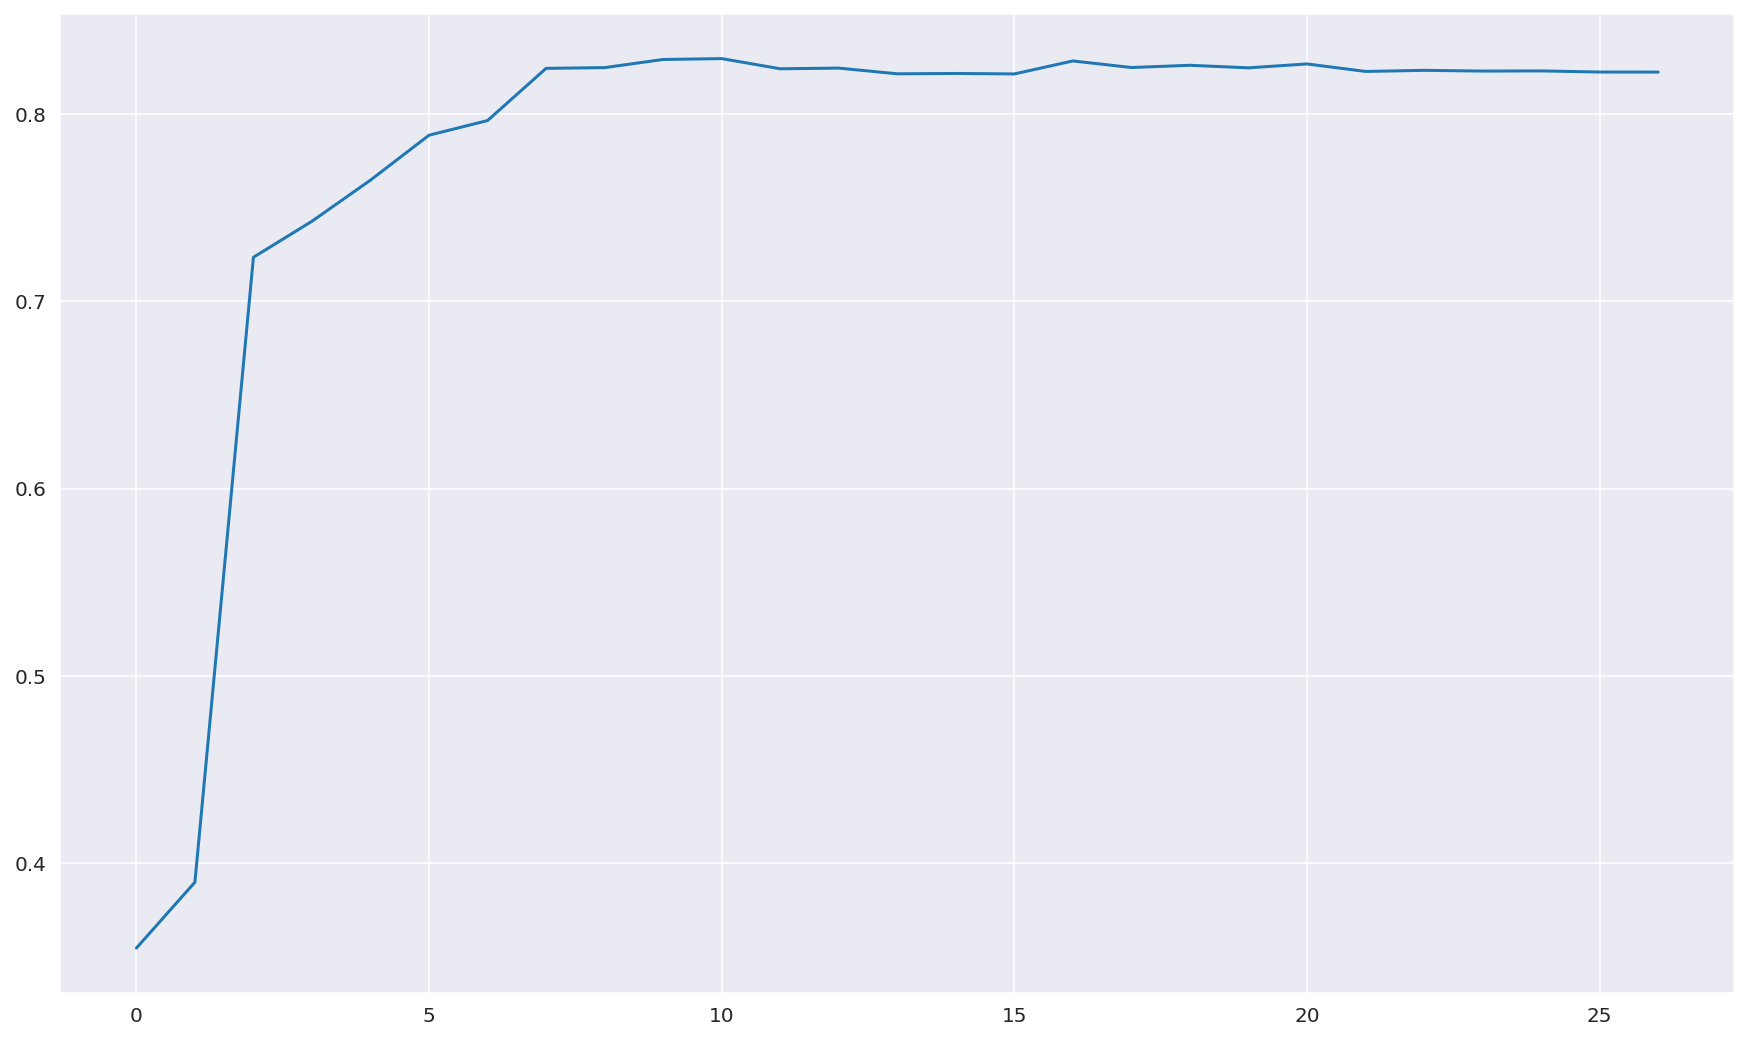

In [114]:
plt.plot(score_list)

In [115]:
from sklearn.feature_selection import RFE
model=LinearRegression()
rfe=RFE(model,10)
#Transforming data using RFE
X_rfe=rfe.fit_transform(X_train,y_train)
#Fittting the data model
model.fit(X_rfe,y_train)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True False False False False
 False False False  True False False False False False False False False
 False False  True]
[ 1  1  1  1  1  1  1  1 16  8  7  5  6 15  4  1  2 18 17 13 14 11  9 12
 10  3  1]


In [117]:
sel=pd.DataFrame([X_train.columns,rfe.ranking_]).T
sel.columns=["cols","select"]
sel=sel[sel['select']==1]

sel

,cols,select
0,yr,1
1,holiday,1
2,temp,1
3,hum,1
4,windspeed,1
5,season_2,1
6,season_3,1
7,season_4,1
15,mnth_9,1
26,weathersit_3,1


In [118]:
selected_cols=sel["cols"].to_list()
selected_cols

['yr',
 'holiday',
 'temp',
 'hum',
 'windspeed',
 'season_2',
 'season_3',
 'season_4',
 'mnth_9',
 'weathersit_3']

In [120]:
lr=LinearRegression()
lr.fit(X_train.loc[:,selected_cols],y_train)
y_train_pred=lr.predict(X_train.loc[:,selected_cols])
print('R2 of train data:',r2_score(y_train,y_train_pred))

y_test_pred=lr.predict(X_test.loc[:,selected_cols])
print('R2 of test data:',r2_score(y_test,y_test_pred))

R2 of train data: 0.8221346807719163
R2 of test data: 0.8290144567417526


In [121]:
cf=pd.DataFrame([X_train.loc[:,selected_cols].columns,lr.coef_]).T
cf.columns=["cols","coefs"]
cf

,cols,coefs
0,yr,1987.08
1,holiday,-662.357
2,temp,5401.37
3,hum,-2408.35
4,windspeed,-2177.87
5,season_2,1148.57
6,season_3,690.828
7,season_4,1614.48
8,mnth_9,790.226
9,weathersit_3,-1538.36


### **REGULARIZATION**

In [0]:
from sklearn.linear_model import Lasso,LassoCV
from sklearn.linear_model import Ridge,RidgeCV,ElasticNet,ElasticNetCV

LASSO

In [137]:
data=pd.read_csv("/content/drive/My Drive/casestudy datasets/bike sharing by day.csv")
data.drop(["casual","registered","instant",'dteday',"atemp","workingday"],axis=1,inplace=True)
data.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,2,0.344167,0.805833,0.160446,985
1,1,0,1,0,0,2,0.363478,0.696087,0.248539,801
2,1,0,1,0,1,1,0.196364,0.437273,0.248309,1349
3,1,0,1,0,2,1,0.200000,0.590435,0.160296,1562
4,1,0,1,0,3,1,0.226957,0.436957,0.186900,1600


In [0]:
cat_cols=['season','mnth','weekday','weathersit']
data=pd.get_dummies(data,columns=cat_cols,drop_first=True)
data["yr"]=data["yr"].map({0:2011,1:2012})

In [0]:
X=data.drop("cnt",axis=1)
y=data.cnt


In [0]:
from sklearn.preprocessing import PolynomialFeatures

pf=PolynomialFeatures()

Xp=pf.fit_transform(X)

feature_names=pf.get_feature_names(X.columns)
Xp=pd.DataFrame(Xp,columns=feature_names)

In [141]:
Xp

,1,yr,holiday,temp,hum,windspeed,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,yr^2,yr holiday,yr temp,yr hum,yr windspeed,yr season_2,yr season_3,yr season_4,yr mnth_2,yr mnth_3,yr mnth_4,yr mnth_5,...,mnth_12 weekday_5,mnth_12 weekday_6,mnth_12 weathersit_2,mnth_12 weathersit_3,weekday_1^2,weekday_1 weekday_2,weekday_1 weekday_3,weekday_1 weekday_4,weekday_1 weekday_5,weekday_1 weekday_6,weekday_1 weathersit_2,weekday_1 weathersit_3,weekday_2^2,weekday_2 weekday_3,weekday_2 weekday_4,weekday_2 weekday_5,weekday_2 weekday_6,weekday_2 weathersit_2,weekday_2 weathersit_3,weekday_3^2,weekday_3 weekday_4,weekday_3 weekday_5,weekday_3 weekday_6,weekday_3 weathersit_2,weekday_3 weathersit_3,weekday_4^2,weekday_4 weekday_5,weekday_4 weekday_6,weekday_4 weathersit_2,weekday_4 weathersit_3,weekday_5^2,weekday_5 weekday_6,weekday_5 weathersit_2,weekday_5 weathersit_3,weekday_6^2,weekday_6 weathersit_2,weekday_6 weathersit_3,weathersit_2^2,weathersit_2 weathersit_3,weathersit_3^2
0,1.0,2011.0,0.0,0.344167,0.805833,0.160446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4044121.0,0.0,692.119837,1620.530163,322.656906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,1.0,2011.0,0.0,0.363478,0.696087,0.248539,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4044121.0,0.0,730.954258,1399.830957,499.811929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,2011.0,0.0,0.196364,0.437273,0.248309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4044121.0,0.0,394.888004,879.356003,499.349399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,2011.0,0.0,0.200000,0.590435,0.160296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4044121.0,0.0,402.200000,1187.364785,322.355256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,2011.0,0.0,0.226957,0.436957,0.186900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4044121.0,0.0,456.410527,878.720527,375.855900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1.0,2012.0,0.0,0.254167,0.652917,0.350133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,4048144.0,0.0,511.384004,1313.669004,704.467596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
727,1.0,2012.0,0.0,0.253333,0.590000,0.155471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4048144.0,0.0,509.705996,1187.080000,312.807652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [142]:
Xp.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 406 columns):
1                            float64
yr                           float64
holiday                      float64
temp                         float64
hum                          float64
windspeed                    float64
season_2                     float64
season_3                     float64
season_4                     float64
mnth_2                       float64
mnth_3                       float64
mnth_4                       float64
mnth_5                       float64
mnth_6                       float64
mnth_7                       float64
mnth_8                       float64
mnth_9                       float64
mnth_10                      float64
mnth_11                      float64
mnth_12                      float64
weekday_1                    float64
weekday_2                    float64
weekday_3                    float64
weekday_4                    float64
weekda

In [0]:
#no_of_cols=len(X_train.columns)

X_train,X_test,y_train,y_test=train_test_split(Xp,y,test_size=0.3,random_state=45)

score_list=[]
for n in range (100):
    model=LinearRegression()
    rfe=RFE(model,n+1)
    X_train_rfe=rfe.fit_transform(X_train,y_train)
    model.fit(X_train_rfe,y_train)
    
    
    
    score=model.score(X_train_rfe,y_train)
    
    score_list.append(score)

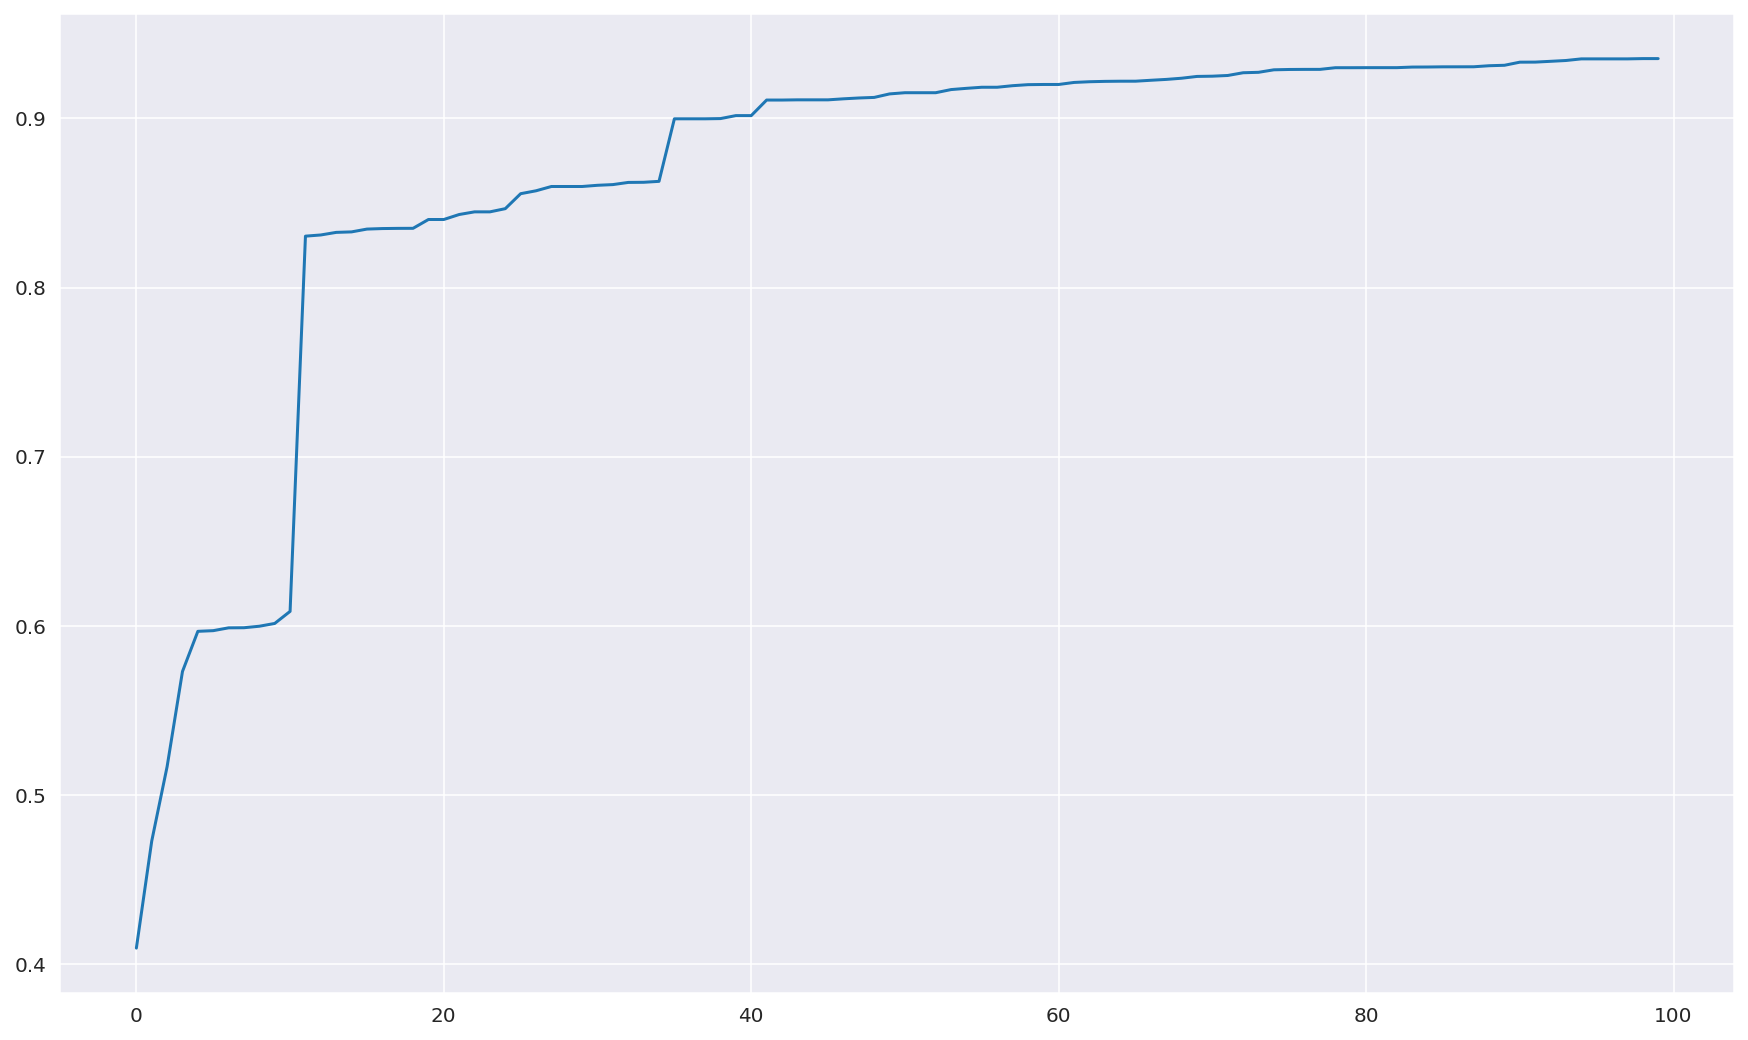

In [147]:
plt.plot(score_list)

In [148]:
from sklearn.feature_selection import RFE
model=LinearRegression()
rfe=RFE(model,50)
#Transforming data using RFE
X_rfe=rfe.fit_transform(X_train,y_train)
#Fittting the data model
model.fit(X_rfe,y_train)
print(rfe.support_)
print(rfe.ranking_)

[False  True False  True  True  True False  True  True False False False
  True  True  True False False False False False False False False False
 False False False  True  True False  True  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False False False False  True  True  True
 False  True False False  True  True False False False  True  True  True
 False False False False False False False False False False  True  True
 False  True False False  True False  True  True  True  True  True  True
 False  True False False False False False False False False  True False
 False False False False False False  True False  True False False  True
  True False False False False False False False  True False False False
 False False False  True False False False False Fa

In [149]:
sel=pd.DataFrame([X_train.columns,rfe.ranking_]).T
sel.columns=["cols","select"]
sel=sel[sel['select']==1]

sel

,cols,select
1,yr,1
3,temp,1
4,hum,1
5,windspeed,1
7,season_3,1
8,season_4,1
12,mnth_5,1
13,mnth_6,1
14,mnth_7,1
27,weathersit_3,1


In [150]:
selected_cols=sel["cols"].to_list()
selected_cols

['yr',
 'temp',
 'hum',
 'windspeed',
 'season_3',
 'season_4',
 'mnth_5',
 'mnth_6',
 'mnth_7',
 'weathersit_3',
 'yr^2',
 'yr temp',
 'yr hum',
 'holiday weekday_4',
 'temp^2',
 'temp hum',
 'temp windspeed',
 'temp season_3',
 'temp mnth_3',
 'temp mnth_4',
 'temp mnth_8',
 'temp mnth_9',
 'temp mnth_10',
 'hum^2',
 'hum windspeed',
 'hum season_3',
 'hum mnth_3',
 'hum mnth_5',
 'hum mnth_6',
 'hum mnth_7',
 'hum mnth_8',
 'hum mnth_9',
 'hum mnth_10',
 'hum mnth_12',
 'windspeed^2',
 'windspeed mnth_6',
 'windspeed mnth_8',
 'windspeed mnth_11',
 'windspeed mnth_12',
 'windspeed weathersit_3',
 'season_2 mnth_5',
 'season_3^2',
 'season_3 mnth_7',
 'season_3 mnth_8',
 'mnth_4 weathersit_3',
 'mnth_5^2',
 'mnth_6^2',
 'mnth_7^2',
 'mnth_8^2',
 'weathersit_3^2']

In [0]:
X_train=X_train.loc[:,selected_cols]
X_test=X_test.loc[:,selected_cols]

In [176]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_train_pred=lr.predict(X_train)
print('R2 of train data:',r2_score(y_train,y_train_pred))

y_test_pred=lr.predict(X_test)
print('R2 of test data:',r2_score(y_test,y_test_pred))

R2 of train data: 0.9144913855949646
R2 of test data: 0.8527059608237291


**LASSO REGULARIZATION**

In [177]:
lasso=Lasso(alpha=0.25,max_iter=5000)
lasso_model=lasso.fit(X_train,y_train)
lasso_model

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1909454.3040826917, tolerance: 191858.4181146771
  positive)


Lasso(alpha=0.25, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [178]:
la=pd.DataFrame([lasso.coef_,X_train.columns]).T
la.columns=["cols","coef"]
la

,cols,coef
0,0,yr
1,-0,temp
2,0,hum
3,0,windspeed
4,2173.99,season_3
5,1739.72,season_4
6,1572.15,mnth_5
7,1712.05,mnth_6
8,519.158,mnth_7
9,-646.372,weathersit_3


we notice that increasing alpha will set more columns to zero.
to identify the best alpha ,we will tune

In [192]:
n_alphas=50
alphas=np.linspace(0.1,1)
lasso_cv=LassoCV(alphas=alphas,random_state=42,cv=3,max_iter=50000)
lasso_cv.fit(Xp,y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36348309.86832389, tolerance: 167651.60448624232
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6466806.3935678005, tolerance: 167651.60448624232
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6682935.053906202, tolerance: 167651.60448624232
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increa

LassoCV(alphas=array([0.01      , 0.03020408, 0.05040816, 0.07061224, 0.09081633,
       0.11102041, 0.13122449, 0.15142857, 0.17163265, 0.19183673,
       0.21204082, 0.2322449 , 0.25244898, 0.27265306, 0.29285714,
       0.31306122, 0.33326531, 0.35346939, 0.37367347, 0.39387755,
       0.41408163, 0.43428571, 0.4544898 , 0.47469388, 0.49489796,
       0.51510204, 0.53530612, 0.5555102 , 0.57571429, 0.59591837,
       0.61612...
       0.71714286, 0.73734694, 0.75755102, 0.7777551 , 0.79795918,
       0.81816327, 0.83836735, 0.85857143, 0.87877551, 0.89897959,
       0.91918367, 0.93938776, 0.95959184, 0.97979592, 1.        ]),
        copy_X=True, cv=3, eps=0.001, fit_intercept=True, max_iter=50000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=42, selection='cyclic', tol=0.0001,
        verbose=False)

In [193]:
lasso_cv.alpha_

1.0

In [202]:
lasso=Lasso(alpha=1,max_iter=50000)
lasso.fit(X_train,y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=50000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [203]:
la=pd.DataFrame([lasso.coef_,X_train.columns]).T
la.columns=["cols","coef"]
la

,cols,coef
0,0,yr
1,-0,temp
2,0,hum
3,-2137.6,windspeed
4,2482.49,season_3
5,1456.75,season_4
6,1262.69,mnth_5
7,1155.78,mnth_6
8,489.161,mnth_7
9,-986.064,weathersit_3


In [204]:
y_train_pred=lasso.predict(X_train)
y_test_pred=lasso.predict(X_test)

print('R2 of train data:',r2_score(y_train,y_train_pred))

y_test_pred=lr.predict(X_test)
print('R2 of test data:',r2_score(y_test,y_test_pred))

R2 of train data: 0.8847143492010456
R2 of test data: 0.8527059608237291


**RIDGE REGULAIZATION**

In [205]:
#higher the alpha value ,more restrictions on the coeff
#low alpha value >more generalizaions
rr=Ridge(alpha=0.5)
#restricted and in this linear and ridge regression resembles
rr.fit(X_train,y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [208]:
pd.DataFrame(rr.coef_,X_train.columns,columns=["coefs"])

,coefs
yr,0.000119
temp,-7.102259
hum,1.356504
windspeed,-1255.925572
season_3,1449.700937
season_4,1530.707478
mnth_5,419.057644
mnth_6,546.868152
mnth_7,27.502068
weathersit_3,-619.440654


In [216]:
n_alphas=50
alphas=np.logspace(-2,0)
Ridge_cv=RidgeCV(alphas=alphas,store_cv_values=True)
Ridge_cv.fit(Xp,y)

Ridge_cv.alpha_

0.517947467923121

In [217]:
Ridge=Ridge(alpha=0.517947467923121,max_iter=50000)
Ridge.fit(X_train,y_train)

Ridge(alpha=0.517947467923121, copy_X=True, fit_intercept=True, max_iter=50000,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [219]:
y_train_pred=Ridge.predict(X_train)
y_test_pred=Ridge.predict(X_test)

print('R2 of train data:',r2_score(y_train,y_train_pred))

print('R2 of test data:',r2_score(y_test,y_test_pred))

R2 of train data: 0.8694040327341233
R2 of test data: 0.8539686075164175


### **ELASTICNET REGULARIZATION**

In [0]:
from sklearn.linear_model import ElasticNetCV,ElasticNet
from sklearn.metrics import r2_score
cv_model=ElasticNetCV(l1_ratio=[.1,.5,.7,.9,.95,.99,.995,1],
                     eps=0.001,n_alphas=100,fit_intercept=True,
                     normalize=True,precompute='auto',max_iter=2000,
                     tol=0.0001,cv=5,
                     copy_X=True)

In [221]:
cv_model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 161320.02747023106, tolerance: 155433.38759387255
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 155224.20864379406, tolerance: 151610.39966601468
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 160460.8238171637, tolerance: 151610.39966601468
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to incre

ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
             l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 0.995, 1], max_iter=2000,
             n_alphas=100, n_jobs=None, normalize=True, positive=False,
             precompute='auto', random_state=None, selection='cyclic',
             tol=0.0001, verbose=0)

In [222]:
print('optimal alpha:',cv_model.alpha_)
print('optimal l1_ratio',cv_model.l1_ratio_)
print('no of iterations',cv_model.n_iter_)



optimal alpha: 0.054877932027835086
optimal l1_ratio 1.0
no of iterations 2000


In [223]:
model=ElasticNet(l1_ratio=cv_model.l1_ratio_,alpha=cv_model.alpha_,max_iter=cv_model.n_iter_,fit_intercept=True,normalize=True)
model.fit(X_train,y_train)

print(r2_score(y_train,model.predict(X_train)))

0.9015333135945055


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 337436.7885097563, tolerance: 191858.4181146771
  positive)


In [225]:
y_train_pred=Ridge.predict(X_train)
y_test_pred=Ridge.predict(X_test)

print('R2 of train data:',r2_score(y_train,y_train_pred))

print('R2 of test data:',r2_score(y_test,y_test_pred))

R2 of train data: 0.8694040327341233
R2 of test data: 0.8539686075164175
